Where are the Iron TF galaxies on the sky?

In [1]:
import numpy as np

from astropy.table import Table
from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u

import ligo.skymap.plot
import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# Data

## DESI Iron

In [2]:
# iron = Table.read('SGA_iron_jointTFR-varyV0-perpdwarf_zCMB0p1_AnthonyUpdates_weightsVmax-1_dVsys_moduli.fits')
iron = Table.read('/global/cfs/cdirs/desi/science/td/pv/tfgalaxies/Y1/DESI-DR1_TF_pv_cat_v14.fits')
iron[:5]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,Z_DESI,ZERR_DESI,V_0p4R26,V_0p4R26_ERR,PHOTSYS,MORPHTYPE_AI,JOHN_VI,Z_DESI_CMB,G_MAG_SB26_CORR,R_MAG_SB26_CORR,Z_MAG_SB26_CORR,G_MAG_SB26_ERR_CORR,R_MAG_SB26_ERR_CORR,Z_MAG_SB26_ERR_CORR,MU_ZCMB,R_ABSMAG_SB26,MU_ZCMB_ERR,R_ABSMAG_SB26_ERR,DWARF,GOOD_MORPH,GOOD_VEL,R_ABSMAG_SB26_TF,R_ABSMAG_SB26_TF_ERR,R_ABSMAG_SB26_TF_ERR_STAT,MU_TF,MU_TF_ERR,LOGDIST,LOGDIST_ERR,MAIN
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,mag,,mag,,,,,,,,,,mag,mag,
float64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float64,float64,bytes1,bytes10,bytes6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,bool
38.0,SGA-2020 38,SDSSJ140638.88+393138.1,3558705,211.66194,39.5272341,S?,81.63,0.35318315,0.37757218,0.08108376,24.72948,18.361,False,LEDA-20181114,12,SDSSJ140638.88+393138.1,1,True,211.66194,39.5272341,0.35318315,2115p395,211.66203166014844,39.52724032794356,0.41757938,SB26,82.21093,0.41431504,211.6619547015994,39.52729608884245,8.520181,5.252184,4.0750155,3.3951538,3.3006833,4.4037066,5.5453897,6.693271,7.8023033,8.999919,10.213078,11.41192,12.527382,19.246052,18.406073,17.931826,18.841032,18.092857,17.659027,18.566164,17.886087,17.47688,18.383362,17.749825,17.355968,18.261652,17.655558,17.284552,18.168955,17.588947,17.231817,18.101948,17.547142,17.20673,18.055267,17.516266,17.18719,18.023865,17.497095,17.178627,0.041267984,0.0

## ALFALFA

In [3]:
alfalfa = Table.read('/pscratch/sd/k/kadglass/data/a100.code12.table2.190808.txt', 
                     format='ascii.csv')
alfalfa[:5]

AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
int64,str8,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64
105367,........,0.00167,5.44333,0.00333,5.4425,11983,274,39,281,1.14,0.08,8.1,1.91,166.0,2.3,9.87,0.05,1
333313,........,0.00375,24.90889,359.9975,24.9075,11181,313,20,333,1.8,0.09,11.3,2.02,154.8,2.3,10.01,0.05,1
331060,478-009b,0.01042,23.08472,0.01417,23.0875,4463,160,4,184,1.96,0.07,14.7,2.35,50.6,10.4,9.07,0.18,1
331061,456-013.,0.01042,15.87222,0.00875,15.88167,6007,260,45,268,1.13,0.09,6.5,2.4,85.2,2.4,9.29,0.06,1
104570,........,0.00667,32.70834,0.005,32.71028,10614,245,6,250,0.86,0.07,6.6,1.86,147.0,2.3,9.64,0.06,1


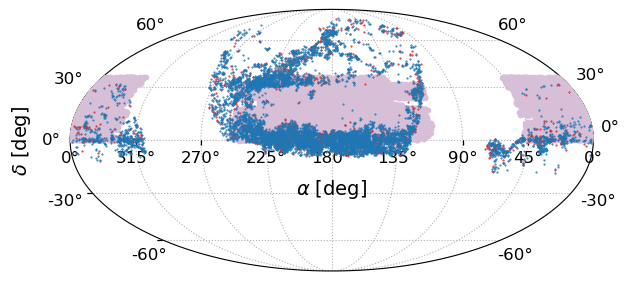

In [5]:
plt.figure(tight_layout=True)

ax = plt.subplot(111, projection='astro degrees mollweide')

# ALFALFA
ax.plot(alfalfa['RAdeg_HI'], 
        alfalfa['DECdeg_HI'], 
        '.', 
        c='thistle', 
        transform=ax.get_transform('world'), 
        label='ALFALFA')

# DESI DR1 TF removed
ax.plot(iron['RA'][~iron['MAIN']], 
        iron['DEC'][~iron['MAIN']], 
        '.', 
        ms=1, 
        c='tab:red', 
        transform=ax.get_transform('world'))

# DESI DR1 TF "main"
ax.plot(iron['RA'][iron['MAIN']], 
        iron['DEC'][iron['MAIN']], 
        '.', 
        ms=1, 
        c='tab:blue', 
        transform=ax.get_transform('world'), 
        label='DESI DR1')

plt.grid(linestyle=':')

plt.tick_params(axis='both', which='major', labelsize=12)

# plt.legend()

ax.set_xlabel(r'$\alpha$ [deg]', fontsize=14)
ax.set_ylabel(r'$\delta$ [deg]', fontsize=14);

# plt.savefig('../../Figures/SV/fuji_ALFALFA_sky.png', dpi=150, facecolor='none');

# Make the same plot, but with DESI's tools

In [6]:
from matplotlib.projections import get_projection_names

from desiutil.plots import init_sky

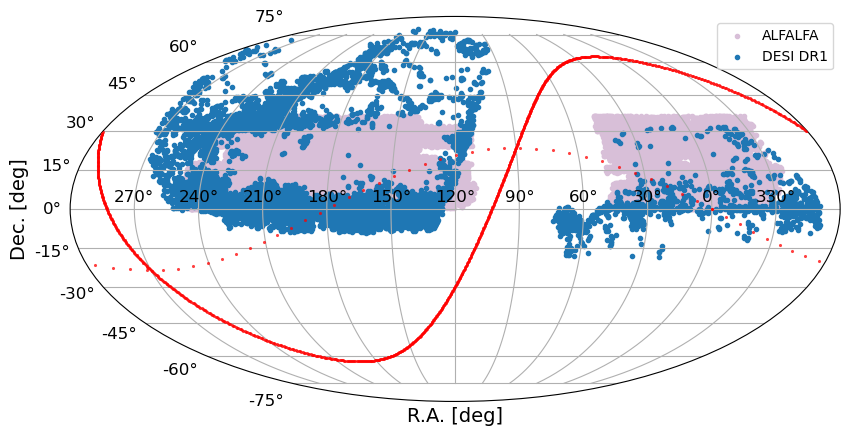

In [19]:
ax = init_sky()

# ALFALFA
ax.scatter(ax.projection_ra(alfalfa['RAdeg_HI']), 
           ax.projection_dec(alfalfa['DECdeg_HI']), 
           marker='.', 
           color='thistle', 
           label='ALFALFA')

# DESI DR1 TF "main" sample
ax.scatter(ax.projection_ra(iron['RA']),#[iron['MAIN']]), 
           ax.projection_dec(iron['DEC']),#[iron['MAIN']]), 
           marker='.', 
           color='tab:blue', 
           label='DESI DR1')

# DESI DR1 TF removed
# ax.scatter(ax.projection_ra(iron['RA'][~iron['MAIN']]), 
#            ax.projection_dec(iron['DEC'][~iron['MAIN']]), 
#            marker='.', 
#            s=2,
#            color='gray')

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

plt.legend()

plt.tick_params(axis='both', which='major', labelsize=12);

plt.savefig('../../Figures/Y1/iron_ALFALFA_sky-DESI.png', dpi=150, facecolor='none');